In [11]:
import torch
from omegaconf import OmegaConf
from hydra import initialize, compose
from diffusion_hub.models.openaimodel import UNetModel
from diffusion_hub.datasets import get_dataset
from diffusion_hub.diffusion import get_diffusion

import matplotlib.pyplot as plt

In [12]:
def visualize_output(output, ax=None):
    """ Visualizes the output of the model."""
    with torch.no_grad():
        attr_input = 0.5*(output+1)
        attr_input = attr_input.contiguous()
        attr_input = attr_input.clamp(0,1)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(3,3))
    ax.imshow(attr_input[0].cpu().numpy().transpose([1,2,0]))

In [13]:

with initialize(config_path="../config", version_base='1.3'):
    cfg = compose(
        config_name="train_config",
        # overrides=[
        #     "data=mnist", 
        #     "task=inpainting"
        #     ]
        )

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = get_dataset(**cfg.data.train_data)
estimator = UNetModel(**cfg.task.model).to(device)
diffusion = get_diffusion(cfg.task.diffusion, estimator=estimator)

In [30]:
checkpoint_path = '/scratch/gilbreth/ahmedb/trained_models/mnist/checkpoints/mnist_generation/checkpoint-steps-0010000.pth'
checkpoint = torch.load(checkpoint_path, map_location='cpu')
model_state_dict = checkpoint["model_state_dict"]
diffusion.load_state_dict(model_state_dict)

<All keys matched successfully>

In [31]:
e_eval = 200
start_x = torch.randn(128, 1, 32, 32).to(device)
# start_x.shape
generated_output = diffusion.edm_ode_sample(e_eval, start_x)

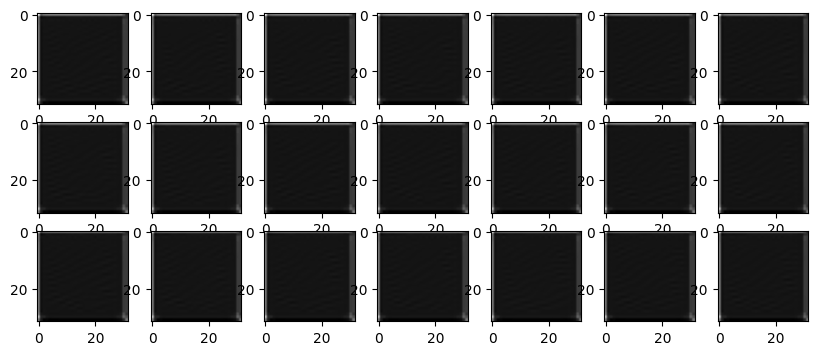

In [32]:
nrows = 3
ncols = 7
fig, axes = plt.subplots(nrows, ncols, figsize=(10,4))
for i in range(nrows):
    for j in range(ncols):
        attr_input = 0.5*(generated_output[i*nrows + j]+1)
        attr_input = attr_input.clamp(0,1)
        axes[i,j].imshow(attr_input.cpu().numpy().transpose([1,2,0]), cmap='gray')

In [4]:

batch_size = 16
train_dataloader = torch.utils.data.DataLoader(
            dataset, batch_size=batch_size
        )

In [7]:
batch = next(iter(train_dataloader))
images, labels = batch
estimator(images.to(device), torch.rand((images.shape[0], )).to(device)).shape

torch.Size([16, 1, 32, 32])

In [28]:
images, labels = batch

In [25]:
batch[0].shape

torch.Size([16, 1, 28, 28])

In [27]:
batch[1].shape

torch.Size([16])

In [28]:
out = dataset[0]

In [30]:
out[0].shape

torch.Size([1, 28, 28])

In [31]:
out[1]

7